# Guided and Leaky Modes of Hollow Core slab waveguide

Essentially the N1 Bragg fiber but in 1D.  Turns out this has significant guided modes near cutoff that hang out, and loss spikes occure when the guided modes pass cutoff.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact
from scipy.optimize import newton
%matplotlib widget
plt.style.use('dark_background')

In [2]:
A = SlabExact(scale=1e-6, Ts=[5, 2, 3, 2, 5],
              ns=[1, 1.44, 1, 1.44, 1], xrefs=[500, 300, 300, 300, 500],
              symmetric=True, wl=1e-6)

In [3]:
# A = SlabExact(scale= 2*4.0775e-05, Ts=[5, 1, 2*4.0775, 1, 5],
#               ns=[1, 1.44, 1, 1.44, 1], xrefs=[500, 300, 600, 300, 500],
#               symmetric=True, wl=6.907e-6)

(<Figure size 1100x400 with 1 Axes>, <Axes: >)

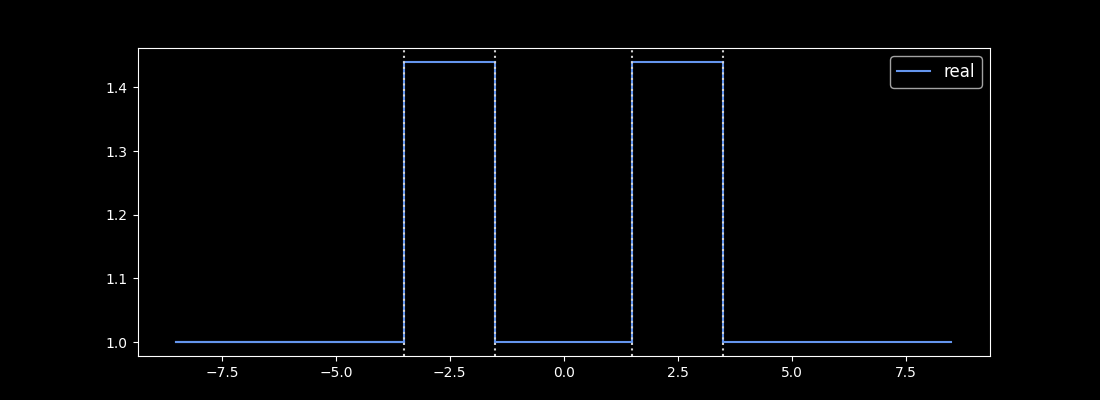

In [4]:
A.plot_refractive_index()

## Loss spike locations

In [5]:
# Formula for loss spikes from article
ms = np.arange(1, 15,1)

n1 = A.ns[0]  # Inner (core) index (same as outermost)
n2 = A.ns[1]  # Cladding index
d = A.Ts[1]  # Thickness of glass 

Ls = (2 * n1 * d / ms * ((n2/n1)**2 - 1)**.5)  # when n2 depends on ls, need solver
Ls*A.scale

array([4.14458683e-06, 2.07229342e-06, 1.38152894e-06, 1.03614671e-06,
       8.28917366e-07, 6.90764472e-07, 5.92083833e-07, 5.18073354e-07,
       4.60509648e-07, 4.14458683e-07, 3.76780621e-07, 3.45382236e-07,
       3.18814372e-07, 2.96041917e-07])

# Leaky Mode Profiles

So we know what the fields might look like when we find them

(<Figure size 1100x500 with 2 Axes>, <Axes: >)

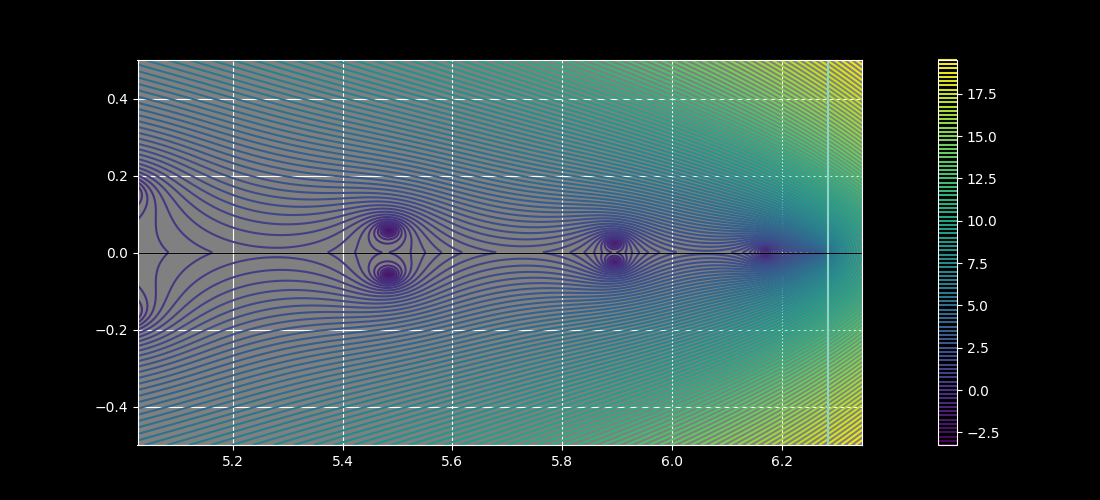

In [17]:
A.determinant_plot(.8*A.K_low, 1.01*A.K_low, -.5, .5, iref=400, rref=400, levels=100,
                   plane='Beta', mode_type='leaky')

In [13]:
fargs = ('leaky', 'Beta')

beta1 = newton(A.determinant, np.array([.999*k_low-.01j]), args=fargs)[0]
print(abs(A.determinant(beta1, *fargs)))

beta2 = newton(A.determinant, np.array([.95*k_low-.015j]), args=fargs)[0]
print(abs(A.determinant(beta2, *fargs)))

A.plot_points([beta1, beta2])

beta1, beta2

[2.14623556e-13]
[4.09651663e-14]


((6.170916106945798+0.009789302801207376j),
 (5.895446967756297+0.02564843300834997j))

In [15]:
Fs1 = A.fields(beta1, mode_type='leaky', plane='Beta')
Fs2 = A.fields(beta2, mode_type='leaky', plane='Beta')

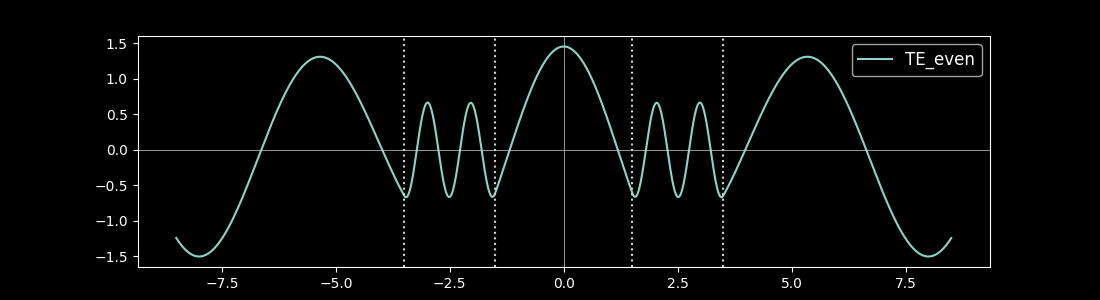

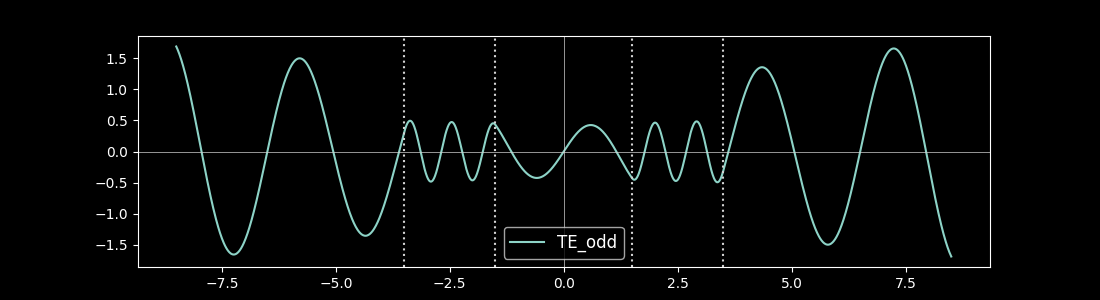

In [16]:
A.plot_field_1d(Fs1, label='TE_even', figsize=(11,3));
A.plot_field_1d(Fs2, label='TE_odd', figsize=(11,3), close_others=False);


# Guided Modes

To see how much we need to put in for that part.

(<Figure size 1100x500 with 2 Axes>, <Axes: >)

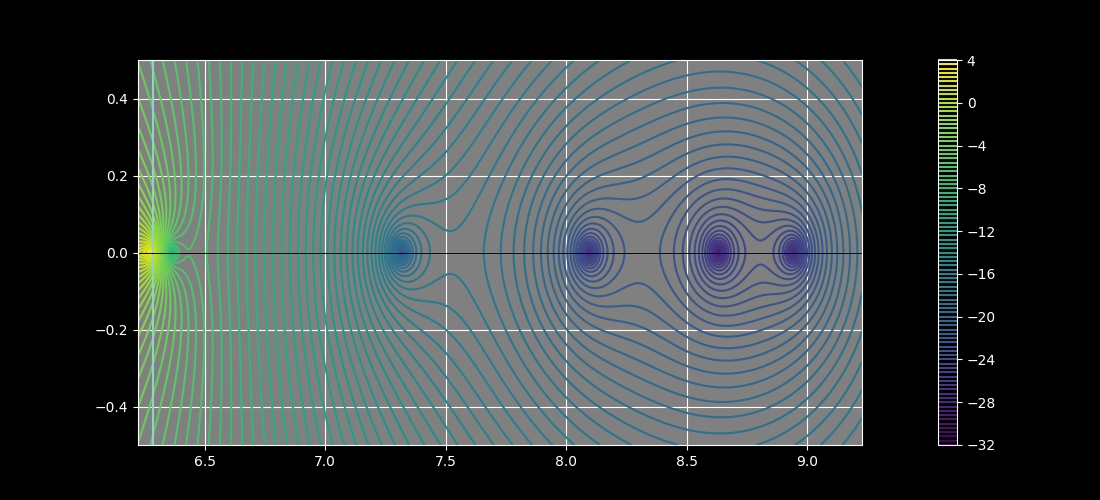

In [21]:
A.determinant_plot(.99*A.K_low, 1.02*A.K_high, -.5, .5, iref=400, rref=400, levels=100,
                   plane='Beta', mode_type='guided')

In [24]:
fargs = ('guided', 'Beta')

beta3 = newton(A.determinant, np.array([.99*A.K_high]), args=fargs)[0]
print(abs(A.determinant(beta3, *fargs)))

beta4 = newton(A.determinant, np.array([.95*A.K_high]), args=fargs)[0]
print(abs(A.determinant(beta4, *fargs)))

beta5 = newton(A.determinant, np.array([.9*A.K_high]), args=fargs)[0]
print(abs(A.determinant(beta5, *fargs)))

beta6 = newton(A.determinant, np.array([.8*A.K_high]), args=fargs)[0]
print(abs(A.determinant(beta6, *fargs)))

beta3, beta4, beta5, beta6

[3.62525979e-24]
[1.59663655e-24]
[9.8799385e-24]
[5.93364361e-21]


((8.94494449928761+1.0807092810252566e-17j),
 (8.631793553210262-1.7818941733102713e-17j),
 (8.094503456329138-7.84304869509142e-17j),
 (7.314617350853024-1.5852024405100663e-16j))

In [25]:
Fs3 = A.fields(beta3, mode_type='guided', plane='Beta')
Fs4 = A.fields(beta4, mode_type='guided', plane='Beta')
Fs5 = A.fields(beta5, mode_type='guided', plane='Beta')
Fs6 = A.fields(beta6, mode_type='guided', plane='Beta')

(<Figure size 1000x300 with 1 Axes>, <Axes: >)

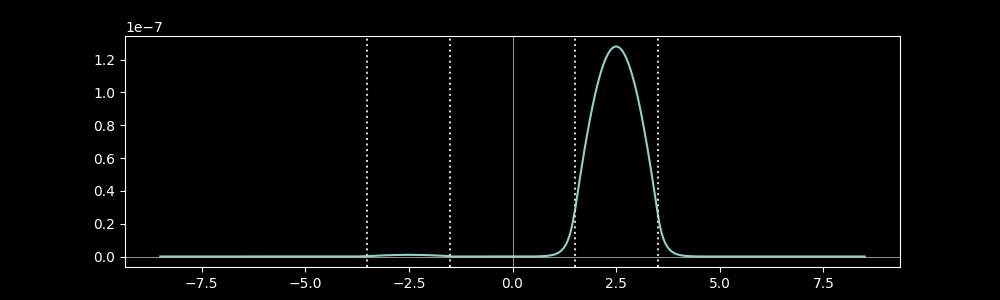

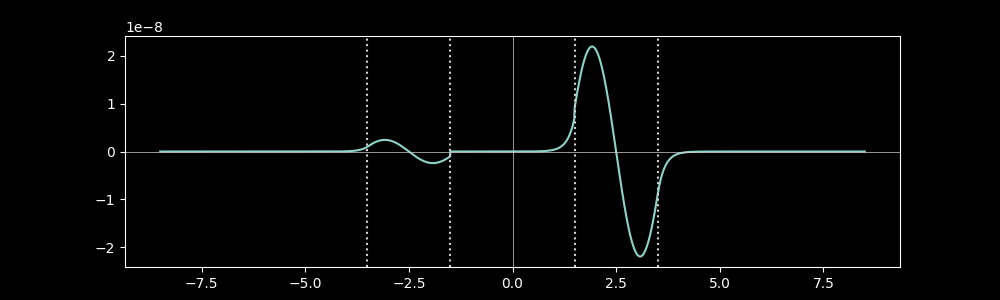

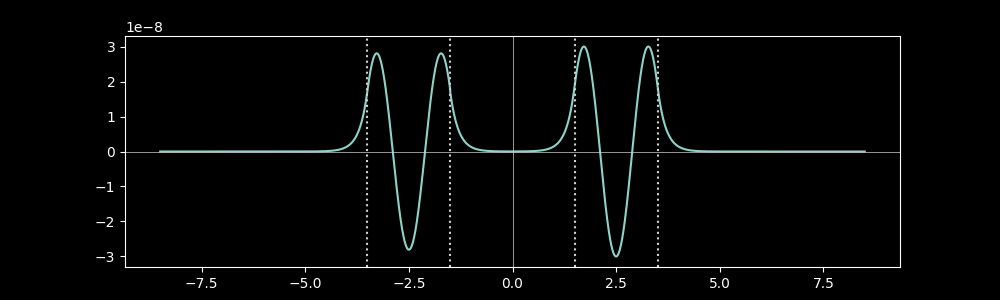

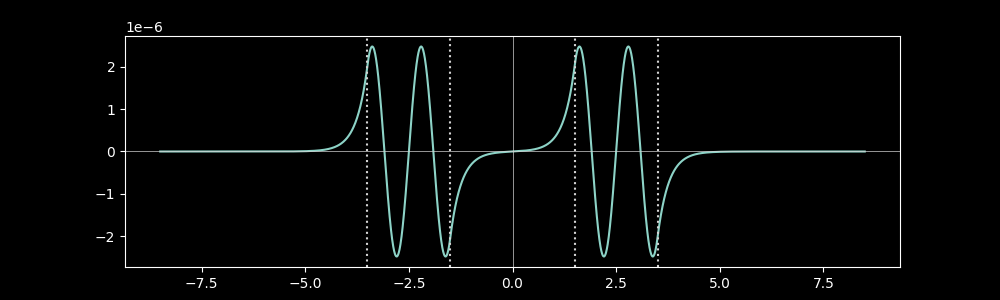

In [26]:
A.plot_field_1d(Fs3, figsize=(10,3))
A.plot_field_1d(Fs4, close_others=False, figsize=(10,3))
A.plot_field_1d(Fs5, close_others=False, figsize=(10,3))
A.plot_field_1d(Fs6, close_others=False, figsize=(10,3))


# Meniscus Modes

Those interesting new modes near klow.  These are in fact just regular guided modes of the cladding as we reach cutoff.

I checked these for Bragg, and they are there, but they really don't have much core stuff until the very last second.  Maybe that is why they don't play a significant role in transmission.

(<Figure size 1100x500 with 2 Axes>, <Axes: >)

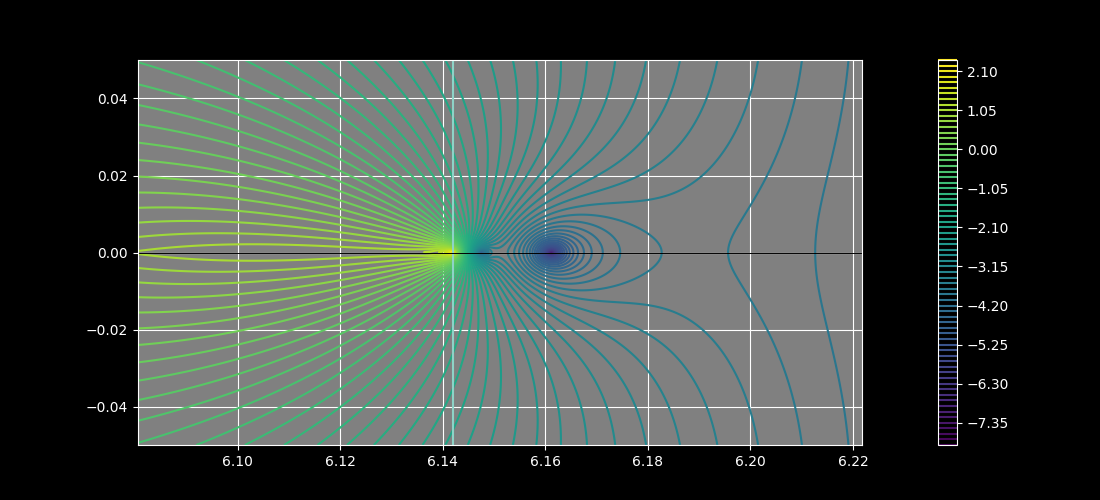

In [29]:
A.wl = 1.023*1e-6

A.determinant_plot(.99*A.K_low, 1.013*A.K_low, -.05, .05, iref=400, rref=400, levels=100,
                   plane='Beta', mode_type='guided')

In [30]:
beta5 = newton(A.determinant, np.array([6.16]), args=fargs)[0]
print(abs(A.determinant(beta5, *fargs)))

beta6 = newton(A.determinant, np.array([6.147]), args=fargs)[0]
print(abs(A.determinant(beta6, *fargs)))

beta5, beta6

[6.26755594e-14]
[1.28064663e-13]


((6.161159147980525+2.476999171567085e-18j),
 (6.1474723571455545+8.886611588717977e-18j))

In [31]:
Fs5 = A.fields(beta5, plane='Beta')
Fs6 = A.fields(beta6, plane='Beta')

(<Figure size 1100x400 with 1 Axes>, <Axes: >)

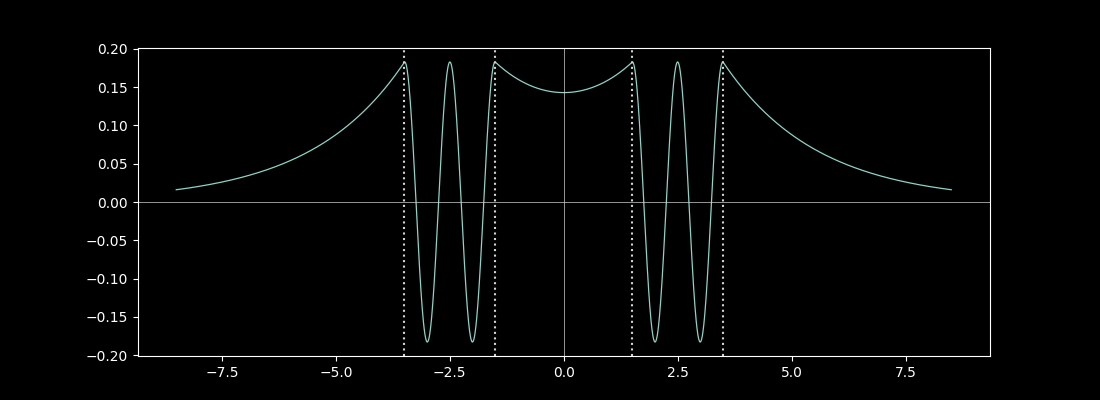

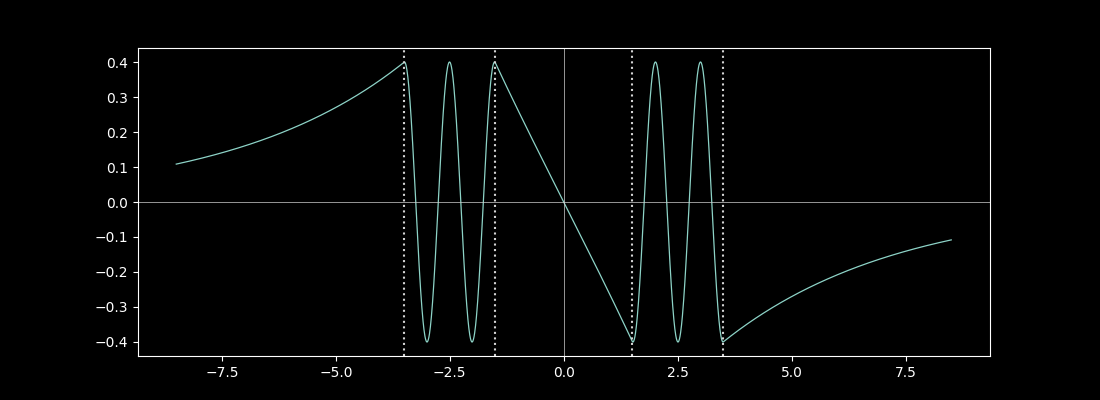

In [32]:
A.plot_field_1d(Fs5, linewidth=.9, color='C0', figsize=(11,4))
A.plot_field_1d(Fs6, linewidth=.9, color='C0', figsize=(11,4), close_others=False)
